# Inferential Statistics

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(5, 5)})

%matplotlib inline

## Uniform Distribution

In [2]:
from scipy.stats import uniform

In [3]:
n = 10000
start = 10
width = 20

data_uniform = uniform.rvs(size = n, loc = start, scale = width)

In [4]:
data_uniform

array([20.99992105, 25.71552428, 29.53751082, ..., 21.69076962,
       16.07361729, 11.45718859])

[Text(0.5, 0, 'Uniform Distribution'), Text(0, 0.5, 'Frequency')]

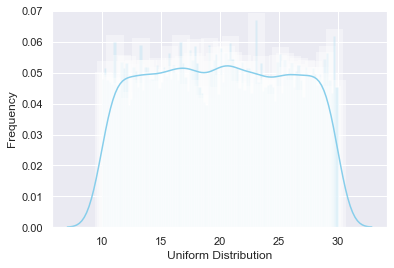

In [7]:
ax = sns.distplot(data_uniform,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 hist_kws={'linewidth':15})

ax.set(xlabel='Uniform Distribution',
      ylabel='Frequency')

## Normal Distribution

In [8]:
from scipy.stats import norm

In [9]:
data_normal = norm.rvs(size=10000, loc=0, scale=1)

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

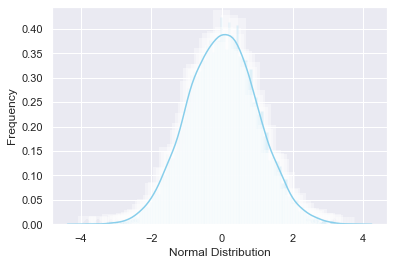

In [10]:
ax = sns.distplot(data_normal,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 hist_kws={'linewidth':15})

ax.set(xlabel='Normal Distribution',
      ylabel='Frequency')

## Binomial Distribution

In [11]:
from scipy.stats import binom

In [12]:
data_binom = binom.rvs(n=10, p=0.8, size=10000)

[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

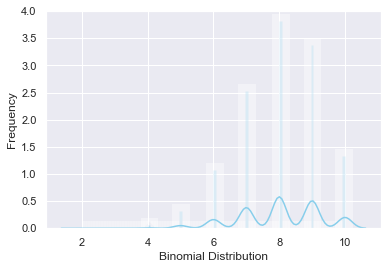

In [13]:
ax = sns.distplot(data_binom,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 hist_kws={'linewidth':15})

ax.set(xlabel='Binomial Distribution',
      ylabel='Frequency')

## Bernoulli Distribution

In [14]:
from scipy.stats import bernoulli

In [15]:
data_bern = bernoulli.rvs(size=10000, p=0.6)

[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

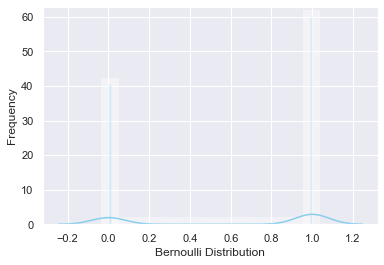

In [16]:
ax = sns.distplot(data_bern,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 hist_kws={'linewidth':15})

ax.set(xlabel='Bernoulli Distribution',
      ylabel='Frequency')

## Confident Interval

In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv('dataset/heart.csv')

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
df.groupby('sex').agg({'chol': [np.mean, np.std, np.size]})

chol                
           mean        std size
sex                            
0    261.455128  64.466781  312
1    239.237027  43.155535  713

In [20]:
mean = 261.455
sd = 64.4
n = 312
z = 1.96

In [21]:
se = sd / np.sqrt(n)

In [22]:
low = mean - z * se
hi = mean + z * se

(low, hi)

(254.3089731821066, 268.60102681789334)

### Example 2

In [23]:
np.random.seed(42)
normal_distribution_us_male = np.random.normal(loc=181, scale=24, size=6000)
normal_distribution_us_female = np.random.normal(loc=132, scale=22, size=6500)

all_mass_values = np.concatenate((normal_distribution_us_male, normal_distribution_us_female), axis=0)

df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})

df_ppl_mass.head()

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


<AxesSubplot:xlabel='us_people_mass_pounds'>

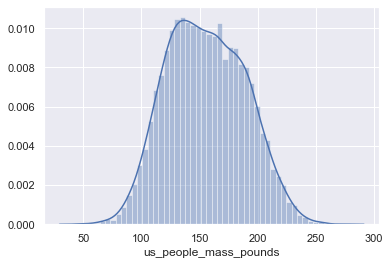

In [24]:
sns.distplot(df_ppl_mass['us_people_mass_pounds'])

In [25]:
pop_mean_mass = df_ppl_mass['us_people_mass_pounds'].mean()
pop_mean_mass

155.42328059423372

In [26]:
pop_std_dev_mass = df_ppl_mass['us_people_mass_pounds'].std()
pop_std_dev_mass

33.58519088395858

In [27]:
sample_means = []
n = 25

for sample in range(0, 300):
    sample_values = np.random.choice(a = df_ppl_mass['us_people_mass_pounds'],
                                     size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

In [28]:
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

155.12418330193915

In [29]:
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

6.734407481483423

In [30]:
standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

6.717038176791716

In [31]:
low_CI = mean_of_sample_means - 1.96 * standard_error
hi_CI = mean_of_sample_means + 1.96 * standard_error

(low_CI, hi_CI)

(141.95878847542738, 168.28957812845093)

In [32]:
pop_mean_mass

155.42328059423372

## Hypothesis Testing